<a href="https://colab.research.google.com/github/sarah23232/fastbook/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # import the dataset from tensor

(x_train, y_train), (x_test, y_test) = mnist.load_data() #unpack dataset to training and testing variables

x_train = tf.keras.utils.normalize(x_train, axis = 1) 
x_test = tf.keras.utils.normalize(x_test, axis = 1)

11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #relu is standard
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #10 is number of classification. 

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3) #this is what you're passing through the model

Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2674 - accuracy: 0.9227
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - accuracy: 0.9656
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0747 - accuracy: 0.9756


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print (val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.9701
0.0900207981467247
0.9700999855995178


^ we're normalizing to make it fit a commo scale - below when we print we can see how it changes the range to just being between 0 - 1. this helps it train - look into more

purpose: 
The short answer is — it dramatically improves model accuracy. Normalization gives equal weights/importance to each variable so that no single variable steers model performance in one direction just because they are bigger numbers.

In [ ]:
import matplotlib.pyplot as plt #to see what it looks like, matplotlib is for visualizing data

plt.imshow(x_train[0], cmap = plt.cm.binary) #imshow is the matplotlib function that creates an image from a 2D array, the part in () with train lets you pick which piece in the dataset to visualize. must be [0] not () - i think this is because it's a list not a string
plt.show() #this actualy shows it #^cmap is for selecting colors you can choose other stuff after .cm - ex: cool

print(x_train[0]) # first we can just see what one piece from the dataset looks like, the 0th piece of data (i'm guessinig this is the tensor representation of a nummber
#^this is a multidimensional array - defintion of tensor

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
model.save('epic_number_reader.model')

INFO:tensorflow:Assets written to: epic_number_reader.model/assets


In [ ]:
new_model = tf.keras.models.load_model('epic_number_reader.model')

In [ ]:
predictions = new_model.predict([x_test]) #predict always takes in a list 

In [ ]:
print(predictions)

[[1.28097299e-09 3.63485846e-08 2.01282601e-05 ... 9.99890447e-01
  5.79680830e-07 8.99271186e-07]
 [9.23525612e-09 8.47859599e-04 9.99133408e-01 ... 2.86851654e-09
  2.46742252e-06 4.34198988e-12]
 [1.57197320e-07 9.99717534e-01 6.14643204e-06 ... 1.21501704e-04
  9.29173402e-05 7.55733197e-07]
 ...
 [3.03360999e-08 3.84847851e-08 2.27991777e-08 ... 2.35969928e-05
  1.43762315e-06 1.39212571e-05]
 [2.73662010e-07 4.77838853e-07 8.50912063e-10 ... 7.52562710e-06
  2.51239492e-03 2.57745103e-10]
 [1.07606698e-04 1.24603716e-07 1.65849633e-05 ... 1.09899695e-07
  1.95707131e-07 9.27594979e-09]]


In [ ]:
import numpy as np #numpy used for data visualization - now we want to draw it

print(np.argmax(predictions[0]))

7


The numpy.argmax() function returns indices of the max element of the array in a particular axis. 

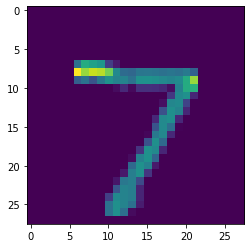

In [ ]:
plt.imshow(x_test[0])
plt.show()

why did this get lighter when you do plt.show?